In [2]:
import os
import pandas as pd

os.chdir('C:\\Users\\dhrugarg\\Documents\\Python Scripts\\Udacity_Numpy_Pandas_Datasets')

pars = pd.read_csv('life_expectancy.csv',iterator = True, chunksize = 100)  # This returns a text file reader object not a df
Life_exp = pd.concat(pars)   # Text file reader object is then concat together one below other
gdp_per_capita = pd.read_csv('gdp_per_capita.csv')
female_completion_rate = pd.read_csv('female_completion_rate.csv')
male_completion = pd.read_csv('male_completion_rate.csv')
employment_above_15 = pd.read_csv('employment_above_15.csv')


In [112]:
# General Array stuff


countries = np.array(employment_above_15['Country'])  #Converting a series to a array simple np.array works !
employment = np.array(employment_above_15['1991'])

# Looping through a array
if True:    # You can toggle this False/True
    for country in countries:
        print 'Examining country {}'.format(country)   # Interesting way of printing a value 

    for i in range(len(countries)):
        country = countries[i]
        country_employment = employment[i]
        print 'Country {} has employment {}'.format(country,
                country_employment)
        
#Looking at the employment above 15 DF and populating the countries with max employment for the year 1991

def max_employment(countries, employment):
    
    max_value = employment.max()
    index = employment.tolist().index(max_value)    # Extract the position of a value from a numpy array can also use np.where
    max_country = countries[index]                  # or in this case employment.argmax() as it gives the index location of the maz value

    return (max_country, max_value)

max_employment(countries,employment)

Examining country Afghanistan
Examining country Albania
Examining country Algeria
Examining country Angola
Examining country Argentina
Examining country Armenia
Examining country Australia
Examining country Austria
Examining country Azerbaijan
Examining country Bahamas
Examining country Bahrain
Examining country Bangladesh
Examining country Barbados
Examining country Belarus
Examining country Belgium
Examining country Belize
Examining country Benin
Examining country Bhutan
Examining country Bolivia
Examining country Bosnia and Herzegovina
Examining country Botswana
Examining country Brazil
Examining country Brunei
Examining country Bulgaria
Examining country Burkina Faso
Examining country Burundi
Examining country Cambodia
Examining country Cameroon
Examining country Canada
Examining country Cape Verde
Examining country Central African Rep.
Examining country Chad
Examining country Chile
Examining country China
Examining country Colombia
Examining country Comoros
Examining country Congo

('Tanzania', 87.5)

In [128]:
# Pandas series subsetting using vector operations examples
# Print the cases where the value of life expectancy and gdp are both below and above the avg
# Interesting code here we are using the logical vectorized operations on the Boolean series that we are developing

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)

def variable_correlation(life_expectancy, gdp):
   
    a= ((life_expectancy - life_expectancy.mean())>0) &  ((gdp - gdp.mean())>0)
    b= ((life_expectancy - life_expectancy.mean())<0) &  ((gdp - gdp.mean())<0)
    c = a|b

    num_same_direction =  len(c[c])                # Replace this with your code
    num_different_direction = len(c[c==False])     # Replace this with your code
    
    return (num_same_direction, num_different_direction)
    
variable_correlation(life_expectancy, gdp)

# The result points to kind of a +ve correlation between life exp and GDP when one increase the other also increases 17 out of 
# 20 times.

(17, 3)

In [131]:
# Finding 

countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola',
    'Argentina', 'Armenia', 'Australia', 'Austria',
    'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
    'Barbados', 'Belarus', 'Belgium', 'Belize',
    'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
]


employment_values = [
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076,
]

# Employment data in 2007 for 20 countries
employment = pd.Series(employment_values, index=countries)


def max_employment(employment):
    
    max_country = employment.idxmax()      # idmax or argmax could be used idxmax generally used for DF's
    max_value = employment.max()         

    return (max_country, max_value)

print max_employment(employment)

('Angola', 75.699996949999999)

In [163]:
# Adding series with different indexes (Replacing Nan's with 0)

s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
sx = s1.add(s2,fill_value = 0)    # Whenever you add two series using .add or even append them allocate them to a new series 
sx                                # the value of the orignal series is not changed for array use np.append(a1,a2)


[22]

BASIC FUNCTIONAL PROGRAMMING

In [166]:
# Very important - Map, Reduce and Filter operations on lists

def f(x): return x % 3 == 0 or x % 5 == 0   # Filter applies the function which should return T/F and only returns a list of 
filter(f, range(2, 25))                     # values for which the ans is true

filter(lambda x: x%3==0 or x%5==0 , range(2, 25))   

def cube(x): return x*x*x                   # Map applies the function to each element of the list provided

map(cube, range(1, 11))



seq = range(8)                              # Can also apply functions with 2 arguments
def add(x, y): return x+y
map(add, seq, seq)


# Add all nos from 0 - 10
def add(x,y): return x+y                    # Takes the first result of the function and uses that result as a input for the next
reduce(add, range(1, 11))                   # element finally just gives one value as output


  



[3, 5, 6, 9, 10, 12, 15, 18, 20, 21, 24]

NameError: name 'data' is not defined

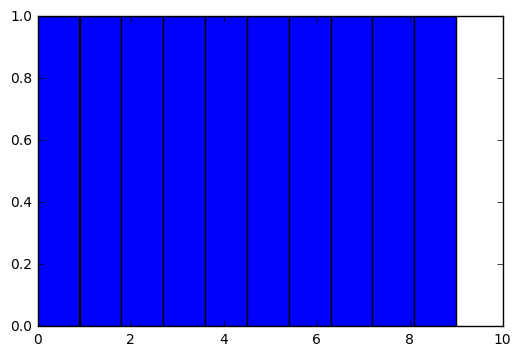

In [253]:
# Simple Apply example 

names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus'])

def reverse_names(names):                         # Creating the reverse function and applying to each row
    return (names.split()[1],names.split()[0])

names.apply(reverse_names)

# Creating Histograms -              You can create similar visuals for arrays/series using pyplot and same commands hist() etc 
import matplotlib.pyplot as plt     #as with a python list
% matplotlib inline
plt.hist(np.array(range(10)))

#data.plot() # Gives a line plot for a series with index as x axis inbuilt functionality in pandas not there for lists

SCIPY

Text(0.5,1,u'Scipy Optimization')

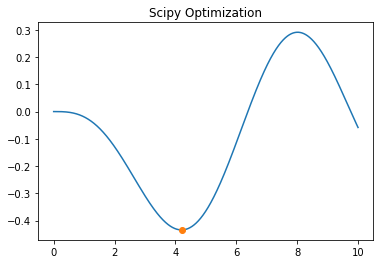

In [253]:
#Quick example on how to use Scipy

import numpy as np
from scipy import special, optimize

# Creating a random function using scipys special library
f = lambda x: -special.jv(3, x)

# Using sublibrary optimize to find the solution
sol = optimize.minimize(f, 1.0)
x = np.linspace(0,10,5000)

# Using matplotlib to plot the curve of function showing optimized solution
plt.plot(x, -special.jv(3, x),'-', sol.x, sol.fun, 'o')
plt.title("Scipy Optimization")

2 - D DATA ANALYSIS USING NUMPY-PANDAS

In [214]:
#os.getcwd()
subway_data = pd.read_csv('nyc_subway_weather.csv')
#subway_data.head()

## Interesting questions to ask - 

# +ve/-ve correlations between variables and subway ridership
# Weather patterns independent of subway ridership over time

a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  #List of list creates a 2-D array

# Picking up a element in a arrays :

a[1,2]    # ie array[i,j]

# Note - Its diferent from picking up a elemnt from a DF 

subway_data.iloc[1].iloc[3]

4388333

Numpy Element Selection Exerscise

In [239]:
ridership = np.array([                # X - Days , Y - Stations
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

# Accessing elements
if False:
    print ridership[1, 3]
    print ridership[1:3, 3:5]
    print ridership[1, :]
    
# Vectorized operations on rows or columns
if False:
    print ridership[0, :] + ridership[1, :]
    print ridership[:, 0] + ridership[:, 1]
    
def mean_riders_for_max_station(ridership):    # Return the mean of the overall array and the station with max ridership on day 1

    frst_day_with_max = ridership[0,:].argmax()
    mean_riders = ridership[:,frst_day_with_max].mean()

    overall_mean = ridership.mean() 
    mean_for_max = mean_riders 

    return (overall_mean, mean_for_max)

mean_riders_for_max_station(ridership)

ridership.mean()

2342.5999999999999

Moving to Data Frames

In [240]:
# Checking data type of a element in a array/series not present in list
b = np.array([1,'Hi'])
b.dtype

# Problem with 2D arrays - everything in a array will have the same data type while in a DF you can have series with diff types 
# of columns 
# Also a DF has index values for each column and each row while a 2D array does not



##### DataFrame creation
if True:
    # You can create a DataFrame out of a dictionary mapping column names to keys
    df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
    print df_1

    # You can also use a list of lists or a 2D NumPy array
    df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
    print df_2
   

   A  B
0  0  3
1  1  4
2  2  5
   A  B  C
0  0  1  2
1  3  4  5


In [247]:
# Calculating the pearson correlation coffecient for 2 DF columns

def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    correlation = average of (x in standard units) times (y in standard units)
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    
    std_f = lambda x: (x- x.mean())/x.std(ddof = 0)
    
    return (std_f(y)*std_f(x)).mean()



entries = subway_data['ENTRIESn_hourly']
cum_entries = subway_data['ENTRIESn']
rain = subway_data['meanprecipi']
temp = subway_data['meantempi']

print correlation(entries, rain)
print correlation(entries, temp)
print correlation(rain, temp)
print correlation(entries, cum_entries)

0.0356485157722
-0.0266933483216
-0.229034323408
0.585895470766


In [415]:
# IMPORTANT - GETTING INDIVIDUAL VALUES FROM RUNNING TOTALS 

# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    def cumm_diff(col):
        col_shift_down = col.shift(1)     # Using shift function here which shifts all values in a column/series down by 1
        cumm_diff = col - col_shift_down  # and curtails the last value
        cumm_diff.iloc[0] = col.iloc[0]
        return cumm_diff
    
    return entries_and_exits.apply(cumm_diff)
    
print get_hourly_entries_and_exits(entries_and_exits)

    ENTRIESn     EXITSn
0  3144312.0  1088151.0
1       23.0        8.0
2       18.0       18.0
3       71.0       54.0
4      170.0       44.0
5      214.0       42.0
6       87.0       11.0
7       10.0        3.0
8       36.0       89.0
9      153.0      333.0


In [256]:
# Applying non standard functions to a Pandas DF
# APPLYMAP - Applies to each element of a DF the function

df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
    
def add_one(x):
    return x + 1
        
print df.applymap(add_one)  

# APPLY - Applies to a column of a DataFrame you can also provide the axis

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

# CASE - 1 RETURNING A DF WHEN APPLYING APPLY TO A DF

def convert_grades_curve(exam_grades):    # When apply is used the function will always take in a series as input
    # Pandas has a bult-in function that will perform this calculation
    # This will give the bottom 0% to 10% of students the grade 'F',
    # 10% to 20% the grade 'D', and so on. You can read more about
    # the qcut() function here:
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    return pd.qcut(exam_grades,
                   [0, 0.1, 0.2, 0.5, 0.8, 1],
                   labels=['F', 'D', 'C', 'B', 'A'])
    
    
print convert_grades_curve(grades_df['exam1'])
    
print grades_df.apply(convert_grades_curve)  # Using apply here for each column


# CASE - 2 RETURNING A SERIES WHEN APPLYING APPLY TO A DF

df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    def sec_larg_series(s1):
        return s1.sort_values(ascending = False).iloc[1]      #n_largest() could also be used its a series function
        
    return df.apply(sec_larg_series)
    

print second_largest(df)

   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16
Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


Adding Pandas Series to a DataFrame

In [280]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    ''' 
        
    return (df - df.mean())/df.std()                      # VERY IMPORTANT FUNCTION LOOK AT IT CAREFULLY
    
standardize(grades_df)

def standardize_along_rows(df):
    
    value_sub_mean_along_row = df.sub(df.mean(axis = 'columns'), axis = 'index')  # HERE AXIS = INDEX AS WE ARE ADDING THE INDEX OF THE SERIES
    standrdize_along_row = value_sub_mean_along_row.div(df.std(axis =  'columns'), axis = 'index') #ALONG THE INDEX OF THE DF
     
    return standrdize_along_row

standardize_along_rows(grades_df)

# WE could have done this using apply but the vectorized version of using the DF and series operations is much shorter and faster

,exam1,exam2
Andre,0.707107,-0.707107
Barry,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107
Fred,0.707107,-0.707107
Greta,0.707107,-0.707107
Humbert,0.707107,-0.707107
Ivan,0.707107,-0.707107
James,0.707107,-0.707107


In [282]:
# GROUP BY - 

values = np.array([1, 3, 2, 4, 1, 6, 4]) 
example_df = pd.DataFrame({                      # Interesting way of making a DF using a dict of arrays
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for each block of code to see what it does

# Examine DataFrame
if False:
    print example_df
    
# Examine groups
if True:
    grouped_data = example_df.groupby('even')                       # Interesting to look at groups here you can use apply to 
    # The groups attribute is a dictionary mapping keys to lists of row indexes    #apply your custom functions to groups
    print grouped_data.groups
    
# Group by multiple columns
if True:
    grouped_data = example_df.groupby(['even', 'above_three'])
    print grouped_data.groups

{False: ['a', 'b', 'e'], True: ['c', 'd', 'f', 'g']}
{(True, False): ['c'], (False, False): ['a', 'b', 'e'], (True, True): ['d', 'f', 'g']}


In [144]:
# Using apply with Group by to calculate the monthly Entry and exit time from the cumilative total
import pandas as pd
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Take a look at the `get_hourly_entries_and_exits()` function
    you wrote in a previous quiz, DataFrame Vectorized Operations. If
    you copy it here and rename it, you can use it and the `.apply()`
    function to help solve this problem.
    '''
    def cumm_diff(col):
        col_shift_down = col.shift(1)     # Using shift function here which shifts all values in a column/series down by 1
        cumm_diff = col - col_shift_down  # and curtails the last value
        cumm_diff.iloc[0] = col.iloc[0]
        return cumm_diff
    
    transf_rows = entries_and_exits.iloc[:,0:2].apply(cumm_diff)
    return pd.concat([transf_rows,entries_and_exits.iloc[:,2]],axis = 1)
     
    
print ridership_df.groupby('UNIT')[['ENTRIESn','EXITSn','UNIT']].apply(get_hourly_entries_and_exits)

# Group by doucumentation - https://pandas.pydata.org/pandas-docs/stable/groupby.html

# Printing groups to get a feel of the structure of a group by object: 

if False:
    for name, group in ridership_df.groupby('UNIT')[['ENTRIESn','EXITSn']]:
        print name
        print group

# Looking at how the group references are stored in a dictionary format:
if False:
    ridership_df[['ENTRIESn','EXITSn','UNIT']].groupby('UNIT').groups


    ENTRIESn      EXITSn  UNIT
0  3144312.0   1088151.0  R051
1  8936644.0  13755385.0  R079
2       23.0         8.0  R051
3       14.0         8.0  R079
4       18.0        18.0  R051
5       29.0       205.0  R079
6       71.0        54.0  R051
7      132.0       593.0  R079
8      170.0        44.0  R051


In [ ]:
# Merging rows horizontally - pd.concat([df1,df2],axis = 1)  One below other the default axis = 0

pd.concat([ridership_df.iloc[:,0:2],ridership_df.iloc[:,2]],axis = 1)

# For doing SQL style joins use : - 

#df1.merge( df2,on=['',''],how='' )

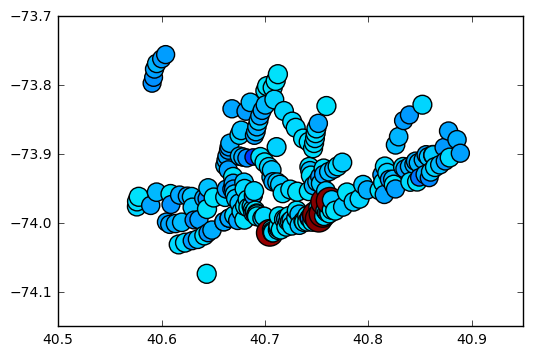

In [422]:
# Doing a simple bubble scatter plot

subway_df_bubble = subway_data[['latitude','longitude','UNIT']].groupby(['latitude','longitude'],as_index = False).count()

plt.scatter(subway_df_bubble['latitude'],subway_df_bubble['longitude'], s=subway_df_bubble['UNIT'],
            marker='o', c=subway_df_bubble['UNIT'])


In [59]:
# Dropping rows/ columns - 
s1 = ridership_df.drop([1],axis = 'index')   # As we are dropping a row so axis has to be index or 0 Also [1] works because 1 is in
                                             # the row index if we try to del by col no 1 wont work as 1 is not the col name
                                             # so use list(df.columns)[1] instead
    # Subsetting based on value in a column      
s1[s1.EXITSn!=222]    # s1.EXITSn!=222 returns a series of True and False !

s2 = s1.loc[s1.EXITSn.isin(s1.iloc[:,1])]

[1, 2, 3] [4, 5, 6]
[]


In [115]:
# Get the no fo unique values in all columns of a pandas df
s1.apply(pd.Series.nunique)

# for i in s1.columns:
#     print s1[i].nunique()

0    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
Name: EXITSn, dtype: int64

In [470]:
a = '12-12-13'
b,c,d = map(int, a.split('-'))   # List allocation feature - a,b = [1,2]  => a = 1, b = 2
d,c = [1,2]
d

1

ADDITIONAL PANDAS INTERESTING STUFF

In [33]:
# READING CSV IN PANDAS

# Using a custom parser function to parse dates in python while importing them

parser = lambda date: pd.datetime.strptime(date,'%d%b%Y')
pd.read_csv(StringIO(s), parse_dates=[0], date_parser=parser)

# Running into memory error when importing a file
# Specify chunk size to import the files in chunks and then join the chunks together using pd.concat.
# Also specify dtype for all columns in advance as that frees considerable memory 
tp  = pd.read_csv('capture2.csv', iterator=True, chunksize=10000, 
                  dtype={'timestamp': float, 'vdd_io_soc_i': float, 'vdd_io_soc_v': float,  'vdd_io_plat_i': float, 'vdd_io_plat_v': float, 'vdd_ext_flash_i': float,   'vdd_ext_flash_v': float,   'vsys_i vsys_v': float, 'vdd_aon_dig_i': float, 'vdd_aon_dig_v': float, 'vdd_soc_1v8_i': float, 'vdd_soc_1v8_v': float})

df = pd.concat(tp,ignore_index=True)

# Zip function for creating a iterator over multiple lists and concatinating them element wise

a1 = [1,2,3]
a2 = [4,5,6]
f1 = zip(a1,a2)
f2 = list(f1)
c,v = zip(*f2)
print c,v

# Alternate non *zip approach
c,v = [],[]
for i in f2:
    c.append(i[0])
    v.append(i[1])
    
print c,v

NameError: name 'StringIO' is not defined

In [126]:
# Using if in Lambda and creating output(binary) variable 

(~pd.isnull(s1.iloc[:,1])).astype(int)  # Wherever the variable value is non 0 returns 1 and otherwise 0

# Same thing using lambda function
s1.iloc[:,1].apply(lambda x:1 if x >0 else 0) # Important if syntax for lambda

# General syntax if you have more than 1 if 
# a = "neg" if b<0 else "pos" if b>0 else "zero"

s1.shape


2    1088159
4    1088177
Name: EXITSn, dtype: int64

In [177]:
# Role of inplace - Setting Inplace = True does not create a copy of the DF and returns none. It makes
# changes to the orignal data frame. For ex as shown in the sort and delete commands belows. 
# Note : By default inplace = 'False' is set in these pandas functions.

import copy
r1 = copy.deepcopy(ridership_df)           
r1.drop(['ENTRIESn'],axis = 1,inplace = True)          # Defualt is axis = 0
r1.sort_values(by=['EXITSn'],axis = 0,inplace = True)  # Default is axis = 0
print r1

#You can also add a element to a list by using '+' and reassigning instead of using .append()
a =[1,3,4]
a = a + [4]
print a

     EXITSn     TIMEn  UNIT
0   1088151  00:00:00  R051
2   1088159  04:00:00  R051
4   1088177  08:00:00  R051
6   1088231  12:00:00  R051
8   1088275  16:00:00  R051
1  13755385  02:00:00  R079
3  13755393  06:00:00  R079
5  13755598  10:00:00  R079
7  13756191  14:00:00  R079
[1, 3, 4, 4]


In [192]:
# 1-D array vs a column vector

import numpy as np
a = np.array(range(10)).reshape(-1,1) # (-1,1) creates a column vector !
print a                               # a is a column vector here as it has 1 column and 10 rows 
b = a.reshape(10,)                    # Interesting to see (10,) creates a 1-D vector         
print b                               # b is a 1-d array or a row vector as it has 1 row and dimension is also 1

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 1 2 3 4 5 6 7 8 9]


(10L,)

In [213]:
# Interesting group by functions 

r2 = r1.groupby('UNIT')['EXITSn'].transform(sum)  #Transform make sures you return as many rows in the 
# print r2                                        # dataset as pre group by so sum value would be repeted
# print r1                                        # for all the rows with the same sum


r3 = r1.groupby('UNIT',as_index = False)['EXITSn'].sum() # By default the as_index = True ie the grouping
r3                                   # unit which in this case is 'UNIT' is pushed to index to prevent
                                     # that and have 'UNIT' as a column use as_index = False

# Another application to subset data using transform 

# df['MAX_CLAIM_LABEL'] = (df['CLAIM_COUNT'] == 
#                          df.groupby(['MEMBER_ELIG_CURR_CK'])['CLAIM_COUNT'].transform(max)).astype(int)

,UNIT,EXITSn
0,R051,5440993
1,R079,55022567


In [241]:
# Subsetting data based on conditions on various columns

# Test if values in 2 cols are equal

r1.loc[r1['EXITSn']!=r1['UNIT'],['EXITSn']]  # Selecting rows where these two cols are not equal and 
                                             # just the'EXITn' column
    
r1.iloc[r1.index[3:]].loc[r1['EXITSn']>19 & isinstance(r1['UNIT'],str),'EXITSn']
                                             # Subsetting based on both index and some column values
    

[[ 1 11]
 [ 2 12]
 [ 3 13]
 [ 4 14]]
[[ 0.          0.        ]
 [ 0.33333333  0.33333333]
 [ 0.66666667  0.66666667]
 [ 1.          1.        ]]


(0, 1)

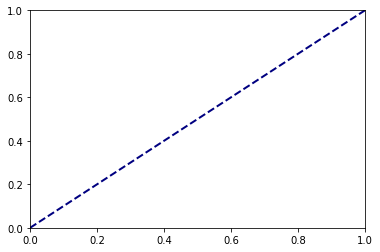

In [259]:
# Getting a base plot for AUC curve

%matplotlib inline
import matplotlib.pyplot as plt 
plt.figure()
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])np.random

In [303]:
# Generate a ranndom numpy array
import numpy as np
np.random.rand(10, 200 * 2).size

# Create a dictionary out of a df
dict = df.to_dict(orient = 'List')    # You can use various orientation options to create diff combinations
for y in dict:                        # of key value pairs # Also this just prints the keys in the dict
    print y

a = [1,2,3]  

import operator                       # Itemgetter creates a itemgetter object which in this case will 
f = operator.itemgetter(1)            # return the second element of the list a above.
print f(a)

# Sort a random list/dictionary using sorted function

random = [(2, 2), (3, 4), (4, 1), (1, 3)]  
pyDict = {'e': [1,3], 'a': 2, 'u': 3, 'o': 4, 'i': 5}
# sort list with key
sortedList = sorted(pyDict.items(),key = f)   #dict.items() creates a tupple of the dict key and value
                                              # and 'f' gets the 2nd item of each tupple by which 
print('Sorted list:', sortedList)             # now the dictionary is sorted

c
b
2
('Sorted list:', [('a', 2), ('u', 3), ('o', 4), ('i', 5), ('e', [1, 3])])


In [332]:
# and vs &

# What does 'and' do - So a and b checks if 'a' is true or not in a locgical way and then prints 'b' if
# a is true else if 'a' is False it prints 'False'. Now how does 'and' check if 'a' is True by eval 
# the argurment is len(a) > 0

mylist1 = [True,  True,  True,  False,  False]
mylist2 = [False, True, False,  True, False]  

print mylist1 and mylist2   # Prints the value of mylist2 as mylist1 evaluates as True (len >0)

print mylist2 and True   # Prints True as it evaluates if mylist2 is True or not (len >0) and then prints 
                   # the second value after and which is True in this case

    
try:
    mylist2 & True # & raises a error as its not a defined operation for list its a vectorized operation    
                   # defined for numpy arrays like + or - 
    
    # This will also raise a error as there is no way to evaluate if a numpy array is true or not 
    # len >0 is not defined as true for a numpy array hence as there is no true function defined 
    # for a np array it throws a error
    np.array(mylist1) and np.array(mylist2)
    
except:            
    print 'Wrong operator & used'
    
print np.array(mylist1) & np.array(mylist2)   # This does the vectorized & operation between all elements
                                              # of the numpy array.
print np.array(mylist1) | np.array(mylist2)   # Does the OR operator

[False, True, False, True, False]
True
Wrong operator & used
[False  True False False False]


In [16]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

# How to apply a function
grades_df.apply(lambda x:10 if x[1]<30 else 3 if x[1]<50 else 9 ,axis = 1)

Andre      10
Barry       9
Chris       9
Dan         9
Emilio      9
Fred        9
Greta       9
Humbert     3
Ivan        9
James       9
dtype: int64

In [22]:
import numpy as np
#a = pd.DataFrame(data = [1,2,3] ,columns = ['a','b','c'])
data = np.array([1,2,3])
print np.array(1)

1
